In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA

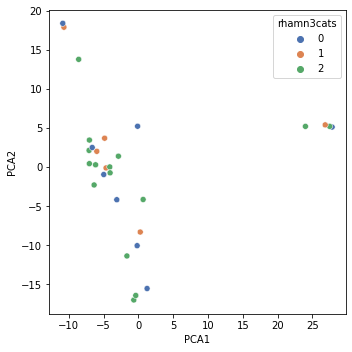

In [137]:
df = pd.read_csv('gene_presence_absence.csv', index_col=0)
df = df.iloc[:,13:]
df = df[df.isna().any(axis=1)]

df_rhamn3 = pd.read_excel('../rhamnolipids/rhamnMat.xlsx')[['strain','rhamn3cats']]
df_rhamn3.loc[df_rhamn3.strain=='PA14','strain'] = 'UCBPP-PA14'

common = list(set(df.columns).intersection(set(df_rhamn3.strain)))
df = df[common]
df_rhamn3 = df_rhamn3.set_index('strain').loc[common]

for c in common:
    df.loc[df[c].notnull(), c] = 1
df = df.fillna(0).T

pca = PCA(n_components=2)
Xscore = pca.fit_transform(df)


df2plot = pd.DataFrame(Xscore, columns=['PCA1','PCA2'], index=common)
df2plot = pd.merge(df2plot, df_rhamn3, left_index=True, right_index=True, how='inner')

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df2plot, x='PCA1', y='PCA2', hue='rhamn3cats', palette="deep")

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('pca.svg', dpi=600)

In [37]:
pca.explained_variance_ratio_

array([0.19019864, 0.1156404 ])

In [139]:
df.to_csv('genes_presence_absence_processed.csv')

# Genes missing in non-producers but present in all strong- and mild-producers

In [130]:
df = pd.read_csv('gene_presence_absence.csv', index_col=0)
df = df.iloc[:,13:]
df = df[df.isna().any(axis=1)]
df_rhamn3 = pd.read_excel('../rhamnolipids/rhamnMat.xlsx')[['strain','rhamn2cats']]
df_rhamn3.loc[df_rhamn3.strain=='PA14','strain'] = 'UCBPP-PA14'

common = list(set(df.columns).intersection(set(df_rhamn3.strain)))
df = df[common]
df_rhamn3 = df_rhamn3.set_index('strain').loc[common]

for c in common:
    df.loc[df[c].notnull(), c] = 1
df = df.fillna(0).T

df = pd.merge(df, df_rhamn3, left_index=True, right_index=True, how='inner')
genes_kept = []
for c in df.columns:
    df2 = df[df.rhamn2cats==1]
    df3 = df[df.rhamn2cats==0]
    if df2[c].sum() == len(df2) and df3[c].sum() < len(df3):
        if not c.startswith('group'):
            genes_kept.append(c)
df = df.loc[df.rhamn2cats==0,genes_kept].T

In [131]:
df.loc['soxR_1']

H27930    1
M1608     1
M55212    1
F5677     0
W36662    1
S86968    1
W60856    1
F63912    1
Name: soxR_1, dtype: int64

In [132]:
df.loc['katE']

H27930    1
M1608     0
M55212    1
F5677     1
W36662    1
S86968    1
W60856    1
F63912    1
Name: katE, dtype: int64

In [134]:
df.loc[df.M1608==0,'M1608']

gbsA          0
lipR          0
cynS          0
puuP_4        0
ttgR          0
             ..
elfC          0
mltF_4        0
garR_2        0
yjiK_3        0
rhamn2cats    0
Name: M1608, Length: 142, dtype: int64

In [136]:
print(list(df.loc[df.M1608==0,'M1608'].index))

['gbsA', 'lipR', 'cynS', 'puuP_4', 'ttgR', 'accA1_2', 'mdrP', 'yohC_1', 'glgA', 'ybhN', 'hdfR_3', 'pxpA3_1', 'pxpB_2', 'asnO_2', 'kynB', 'catM', 'iscS_2', 'yejB_1', 'btuB_8', 'pgrR_5', 'norR_2', 'bdhA', 'pqqE', 'pqqA', 'pipB2', 'liaS', 'brnQ_1', 'hpcD_2', 'pbuE_3', 'malQ', 'treY', 'glgX', 'hrp1_2', 'clsB', 'glgB', 'glgE2', 'katE', 'malP', 'ydaD', 'pncC_2', 'ligD', 'pdeB_2', 'yadV_5', 'ybdM', 'betA_1', 'dmlR_19', 'leuO', 'ada_2', 'yjhB_1', 'nicP_8', 'pxpC_2', 'fecI_6', 'ssuD_3', 'pfeA_2', 'tam_2', 'cmtAc', 'cmtAb', 'lrp_3', 'kynU', 'aroP_2', 'fusB', 'btuB_7', 'novN', 'hcaT_1', 'yejF_1', 'efpA', 'cynR_3', 'cynT_2', 'fecR_4', 'fecI_7', 'rhaS_8', 'yidD', 'sstT', 'puuA_3', 'cmoA_1', 'norG_3', 'decR', 'garB', 'gtaB', 'rkpK_2', 'acrE', 'acrB_1', 'mmgC_3', 'menB_1', 'liuE', 'kdgR_3', 'hmgA', 'nagL_2', 'pcaK_3', 'atoE', 'phaA', 'scoB', 'scoA', 'gltC_4', 'acsA_2', 'ppiC_2', 'yhhS', 'dhaT_2', 'pqqD', 'pqqC', 'pqqB', 'adh_3', 'exaA', 'exaE', 'degU_3', 'ybiT', 'azoR1_1', 'dmlR_20', 'rbsK', 'rbsR', 